# Fit measurement

The data is in the file `signal.csv`.  Open that file with, e.g., Notepad (Kladblok) and check whether there is a header, and which delimiter was used.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read the file

In [2]:
data = np.genfromtxt('signal.csv', delimiter=',', skip_header=1)

In [3]:
data.shape

(1001, 2)

In [5]:
data[:5, :]

array([[  0.        ,  23.09122734],
       [  0.05      ,  26.03109003],
       [  0.1       ,  25.35634386],
       [  0.15      ,  28.84360161],
       [  0.2       ,  28.2397526 ]])

Plot `signal` versus `t`.

In [6]:
t = data[:, 0]
signal = data[:, 1]

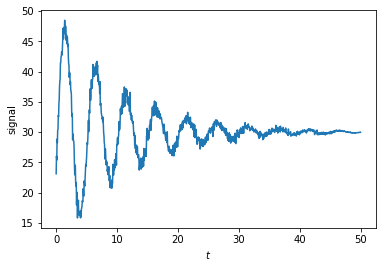

In [10]:
plt.plot(t, signal)
plt.xlabel('$t$')
plt.ylabel('signal');

The theoretical model is $S(t) = A + B \cos(2\pi f t + \phi) \exp(-\alpha t)$.  Find values for the parameters $A$, $B$, $f$, $\phi$, and $\alpha$ that fit the signal best.

In [11]:
import math
math.log(2)/10.0

0.06931471805599453

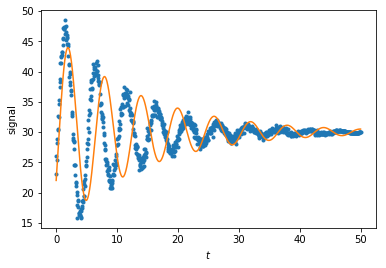

In [15]:
A = 30
B = 16
f = 1.0/6.0
phi = 2.0*np.pi - 2.0*np.pi/3.0
alpha = 0.07
theor = A + B*np.cos(2*np.pi*f*t + phi)*np.exp(-alpha*t)
plt.plot(t, signal, '.')
plt.plot(t, theor)
plt.xlabel('$t$')
plt.ylabel('signal');

In [16]:
from scipy.optimize import curve_fit

In [27]:
def func(t, A, B, f, phi, alpha):
    return A + B*np.cos(2*np.pi*f*t + phi)*np.exp(-alpha*t)

In [28]:
opt, _ = curve_fit(func, t, signal,
                   p0=[30, 16, 1/6, 2.0*np.pi - 2.0*np.pi/3.0, 0.07])

In [29]:
opt

array([ 29.98801223,  19.87009672,   0.19984945,   4.40400993,   0.09850726])

In [22]:
A = 30
B = 16
f = 1.0/6.0
phi = 2.0*np.pi - 2.0*np.pi/3.0
alpha = 0.07

In [30]:
fitted = func(t, *opt)

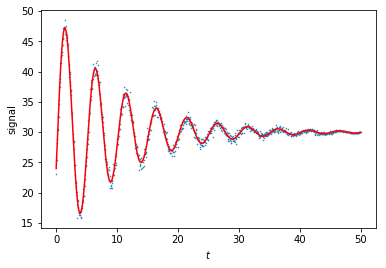

In [34]:
A = 30
B = 16
f = 1.0/6.0
phi = 2.0*np.pi - 2.0*np.pi/3.0
alpha = 0.07
theor = A + B*np.cos(2*np.pi*f*t + phi)*np.exp(-alpha*t)
plt.plot(t, signal, '.', markersize=1)
# plt.plot(t, theor)
plt.plot(t, fitted, 'r')
plt.xlabel('$t$')
plt.ylabel('signal');